## Reducción de dimensión
La reducción de dimensión es un problema que se usa principalmente para visualizar datos. A menudo, los datos que se van a analizar tienen muchas dimensiones, lo que los hace complejos y dificulta su interpretación. Resulta muy útil poder ver la distribución de los datos para la toma de desiciones, como por ejemplo elegir un buen número de clusters. 

Al graficar los datos se tiene la limitante de que sólo lo podemos hacer hasta con 3 dimensiones. Es por eso que resulta muy útil un algoritmo que reinterprete la *forma* de los datos y los presente en una dimensión más baja.

## Análisis de componentes principales

El algoritmo de Análisis de Componentes Principales (PCA) aprende una representación de los datos. Aplica una tranformación lineal para reducir la dimensión perdiendo la menor información posible. Además, elimina correlaciones lineales que pudieran traer los datos, como por ejemplo, el peso y la altura de una persona suelen estar relacionadas y se podría considerar información redundante. 

### Teoría
Tenemos los puntos $x_1, \ldots, x_m$ en $\mathcal{R}^n$ y queremos representarlos con $c_1, \ldots, c_m$ en $\mathcal{R}^\ell$ con $\ell<n$. Vamos a usar una función de **codificar** $f$ con $f(x_i)=c_i$ para proyectar los datos. También usaremos una función **decodificadora** $g$ tal que $g(f(x))$ se *parezca* a x. Esto quiere decir que lo idela sería tener $g(f(x))=x$ pero siempre habrá una pérdida de información al reducir la dimensión. Entonces, lo mejor que podemos esperar es que $g(f(x))$ se muy cercano a $x$.

Para el caso de PCA, se elige $g(c)= Dc$ con $D$ una matríz de ${n\times\ell}$ donde las columnas de $D$ son ortogonales de norma 1.

Entonces el código óptimo $c*$ se puede encontrar con 
$$c*=\arg\min_c||x-g(c)||_2^2$$
que tiene solución cuando $c= D^Tx$. Entonces $f(x)= D^Tx$ y $g(c)= D c$ por lo que la reconstrucción queda $g(f(x))= D D^Tx$. El problema se reduce en encontrar la $D$ que menor error tiene al hacer la reconstrucción, sea $D^*$ tal matriz. Entonces

$$D^*=\arg\min_D \sqrt{\sum_{i,j}(x_j^{(i)}-g(f(x_j^{(i)})))^2}$$

donde $D^T D$ es la identidad. 

Vamos a ver el caso más simple donde D es un vector $\mathbf d$, entonces la expresión anterior queda:

$$ \mathbf d*=\arg\min_\mathbf d \sum_{i}||x^{(i)}-\mathbf d\mathbf d^T(x^{(i)}))||^2$$
$$ = \arg\min_\mathbf d ||X-X^T\mathbf d\mathbf d^T||_F$$

donde la norma es la norma de Frobenius. Todo con la restricción de $\mathbf d\mathbf d^T=1$

Todo se reduce (después de algo de álgebra) a:

$$ = \arg\min_\mathbf d -\mathbf{Tr}(X^TX\mathbf d\mathbf d^T)$$

donde $\mathbf{Tr}$ es la traza de la matríz. Que se puede cambiar por

$$ = \arg\max_\mathbf d \mathbf{Tr}(X^TX\mathbf d\mathbf d^T)$$

$$ = \arg\max_\mathbf d \mathbf{Tr}(\mathbf dX^TX\mathbf d^T)$$

con la condición $\mathbf d\mathbf d^T=1$. Esta expresión se puede optimiza cuando $\mathbf d$ es el eigenvector asociado con el mayor eigenvalor de $X^TX$. En general, cuando $\mathbf d$ es la matríz $D$, la expresión resultante se optimiza tomando los mayores eigenvalores y sus vectores asociados.


### Usos

Al reducir la dimensión con un algoritmo como PCA, se obtienen las siguientes ventajas:

- Se usa menos memoria para almacenar datos.
- Al usar menos memoria, se aprovechan las velocidades de la [jerarquía de memoria](https://es.wikipedia.org/wiki/Jerarqu%C3%ADa_de_memoria#:~:text=La%20jerarqu%C3%ADa%20de%20memoria%20es,de%20la%20jerarqu%C3%ADa%20de%20memoria.) aumentando el rendimiento de los algoritmos.
- Se logra que los datos no tengan una correlación lineal
 entre ellos.
- Aprende una transformación ortogonal que alinea las direcciones
 de máxima varianza de los datos con los ejes.
 
 El algoritmo de PCA asume que los datos estén centrados en cero y tengan una desviación estandar de 1. La implementación que usaremos es de sklearn, que centra los datos en cero pero no los reescala, para eso se debe usar el parámetro `whiten`.

## Ejemplo de alineación de ejes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn import datasets

Primero creamos un conjunto de datos y le aplicamos una transformación lineal para centrar los datos en el punto $(2,2)$ y estirar un eje y comprimir el otro. Al final tenemos los datos como se muestra en la figura.

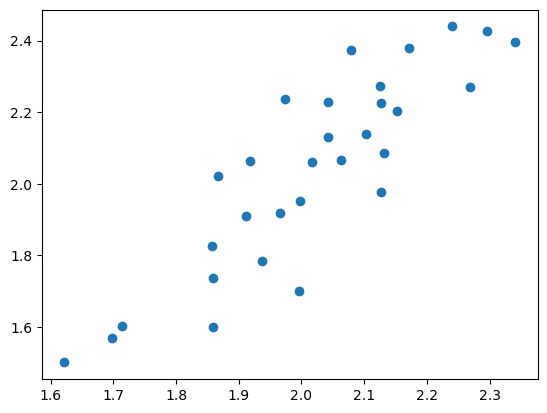

In [2]:
np.random.seed(0)
X = np.random.rand(30, 2) - [0.5, 0.5]
A = [[.4, .5], [.2, 1]]
X = np.array([np.matmul(A, x) for x in X] + np.array([2,2]))
plt.scatter(X[:, 0], X[:, 1])
plt.show()

Luego aplicamos PCA con el mismo número de dimensiones (dos) para que los datos los tengamos centrados en el origen y los ejes balanceados.

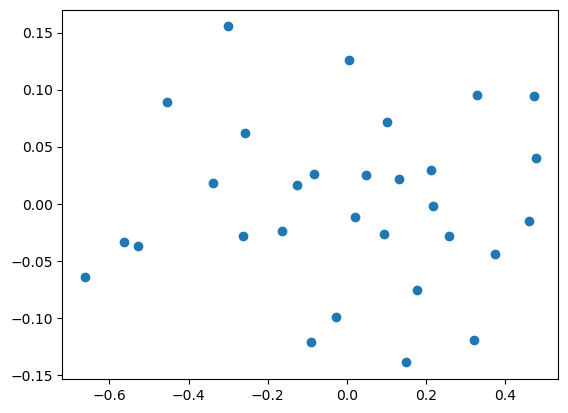

In [3]:
pca = decomposition.PCA(n_components=2)
pca.fit(X)
X_t = pca.transform(X)
plt.scatter(X_t[:, 0], X_t[:, 1])
plt.show()

## Ejemplo de reducción de dimensión

Aquí leemos el conjunto de datos `Iris` contenido en **sklearn**. Consiste en datos sobre las caraterísiticas físicas de 3 clases de plantas. En total son 150 datos en 4 dimensiones. La variable `y` guarda la clase a la que pertenece la flor.

In [4]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
print(X.shape, y.shape)

(150, 4) (150,)


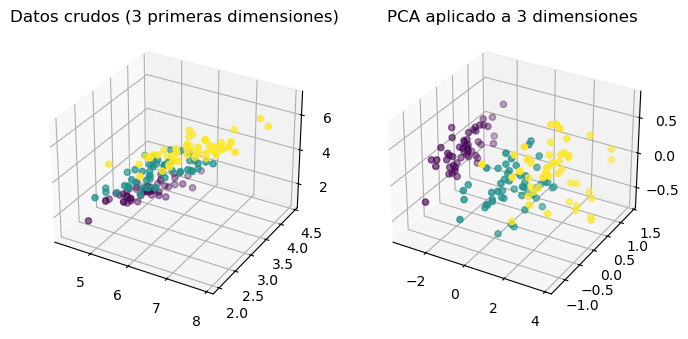

In [5]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,2,1,projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=y)
ax.set_title("Datos crudos (3 primeras dimensiones)")

pca = decomposition.PCA(n_components=3)
pca.fit(X)
X_t = pca.transform(X)

ax = fig.add_subplot(1,2,2,projection='3d')
ax.scatter(X_t[:,0], X_t[:,1], X_t[:,2], c=y)
ax.set_title("PCA aplicado a 3 dimensiones")
plt.show()

En la figura anterior podemos ver cómo los datos crudos se muestran más pegados (aunque puede ser una ilusión al ignorar la cuarta dimensión) y los datos después de aplicar PCA se separan un poco más. Note también que los rangos de valores cambiaron.

Después de aplicar el método PCA a los datos, podemos revisar el porcentaje de varianza explicada por cada una de las dimensiones finales. Esto lo podemos ver en el método `explained_variance_ratio_`. La primera componente tiene un 92% de la varianza, la segunda sólo un 5% y la tercera menos del 2%. Esto nos dice que podemos quedarnos con las primeras dos dimensiones y no perder mucha información. 

In [6]:
print(pca.explained_variance_ratio_)
print("Varianza retenida después de reducir dimensiones:", 
      np.sum(pca.explained_variance_ratio_))

[0.92461872 0.05306648 0.01710261]
Varianza retenida después de reducir dimensiones: 0.9947878161267246


Ahora veamos cómo quedan los datos usando reducción a dos dimensiones.

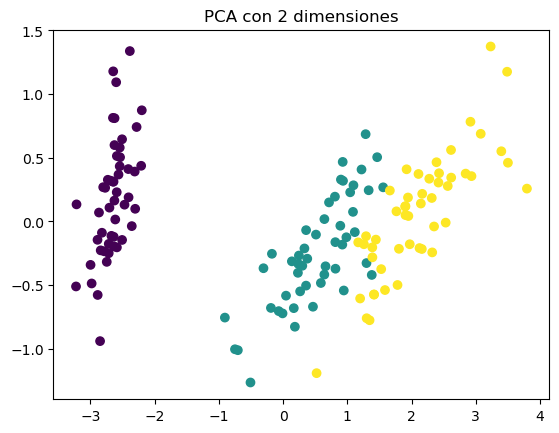

In [7]:
pca = decomposition.PCA(n_components=2)
pca.fit(X)
X_t = pca.transform(X)
plt.scatter(X_t[:, 0], X_t[:, 1],  c=y)
plt.title("PCA con 2 dimensiones")
plt.show()

Revisamos la varianza retenida

In [8]:
print("Varianza retenida después de reducir dimensiones:", 
      np.sum(pca.explained_variance_ratio_))

Varianza retenida después de reducir dimensiones: 0.9776852063187924


Finalmente veamos que pasa si reducimos a una sola dimesión.

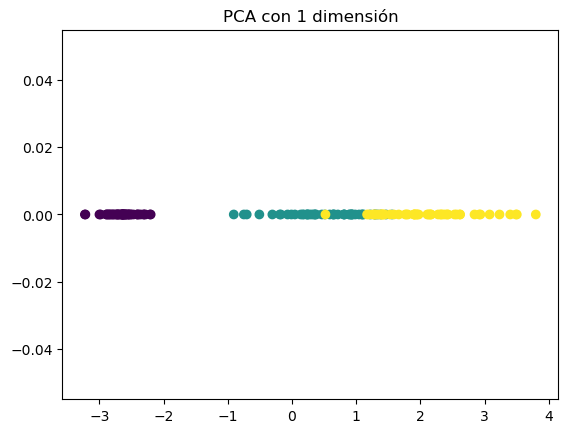

In [9]:
pca = decomposition.PCA(n_components=1)
pca.fit(X)
X_t = pca.transform(X)
plt.scatter(X_t[:, 0], [0]*len(X_t),  c=y)
plt.title("PCA con 1 dimensión")
plt.show()

In [10]:
print("Varianza retenida después de reducir dimensiones:", 
      np.sum(pca.explained_variance_ratio_))

Varianza retenida después de reducir dimensiones: 0.924618723201727


## Ejemplo de separación de datos 

PCA se puede usar para separar los datos similares, lo que facilita la creación de clusters. Una vez separados los datos con PCA se pueden aplicar algoritmos como **k-means** o **DBSCAN** para agrupar los elementos.

Veamos un ejemplo sencillo con imágenes de dígitos. Se tomarán 4 clases (con el parámetro `n_class=4`). Con esto tenemos imágenes de 8x8 pixeles. En la imagen se muestran los primeros 20 dígitos, note que se trata de los números 0, 1, 2 ó 3.

In [11]:
from sklearn.metrics import silhouette_score

In [12]:
digits = datasets.load_digits(n_class=4)
X = digits.images
y = digits.target
X.shape, y.shape

((720, 8, 8), (720,))

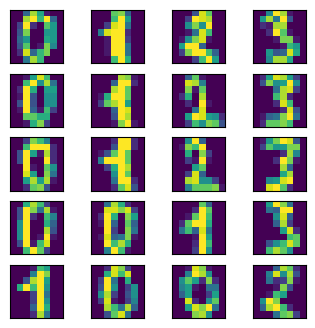

In [13]:
fig=plt.figure(figsize=(4, 4))
columns = 4
rows = 5
for i in range(20):
    img = X[i]
    fig.add_subplot(rows, columns, i + 1)
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
plt.show()

El siguiente paso es *aplanar* las imágenes para obtener vectores de una dimensión. Esto se hace con el método `reshape` y le pedimos que nos de vectores de 64 entradas, una por cada pixel.

In [14]:
X = X.reshape((720, 64))
X.shape

(720, 64)

Con los datos originales podemos calcular el coeficiente de silueta

In [15]:
silhouette_score(X, y, metric='euclidean')

np.float64(0.23320660366878895)

Hacemos la reducción de dimensiones y graficamos los resultados. Note que los datos están separados y esto ayudará a formar los clusters.

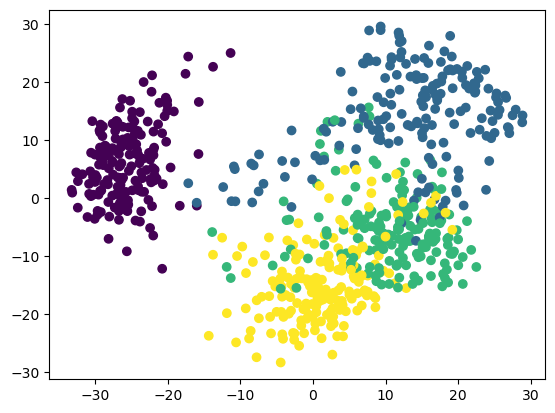

In [16]:
pca = decomposition.PCA(n_components=2)
pca.fit(X)
X_t = pca.transform(X)
plt.scatter(X_t[:, 0], X_t[:, 1], c=y)
plt.show()

Al final medimos la silueta de los datos con dimensión reducida. Note que el valor aumentó en comparación con los datos originales, lo que sugiere que los clusters están mejor formados después de aplicar PCA.

In [17]:
silhouette_score(X_t, y, metric='euclidean')

np.float64(0.3886280648763625)